### Домашнее задание 3
<ol>
<li>Постройте нейронную сеть(берем простую линейную сеть, которую разбирали на уроке: меняем число слоев, число нейронов , типы активации, тип оптимизатора) на датасет from sklearn.datasets import load_boston.
<ul>
<li>Измените функцию потерь и метрику для этой задачи. Постройте 10-15 вариантов и сведите результаты их работы в таблицу Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?
<li>Поработайте с документацией TensorFlow 2. Найти 2-3 полезные команды TensorFlow, не разобранные на уроке (полезные для Вас).
</ul>
    <li>(*) Попробуйте обучить нейронную сеть на TensorFlow 2 на датасете imdb_reviews .Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?


In [2]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import os.path
import itertools
import warnings
import time
from pprint import pprint
import seaborn as sns

from tensorflow import keras as keras
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend as K

import warnings

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import plot_model
from keras.datasets import boston_housing

from sklearn.metrics import r2_score

%matplotlib inline
warnings.filterwarnings('ignore')

#### Загружаем данные

In [1]:


(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

X_train.shape, y_train.shape, X_test.shape

65536/57026 [==================================] - 0s 0us/step


((404, 13), (404,), (102, 13))

In [3]:
# 1.2. Features types and NANs
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)

display(X_train_df.info())
display(X_test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       404 non-null    float64
 1   1       404 non-null    float64
 2   2       404 non-null    float64
 3   3       404 non-null    float64
 4   4       404 non-null    float64
 5   5       404 non-null    float64
 6   6       404 non-null    float64
 7   7       404 non-null    float64
 8   8       404 non-null    float64
 9   9       404 non-null    float64
 10  10      404 non-null    float64
 11  11      404 non-null    float64
 12  12      404 non-null    float64
dtypes: float64(13)
memory usage: 41.2 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       102 non-null    float64
 1   1       102 non-null    float64
 2   2       102 non-null    float64
 3   3       102 non-null    float64
 4   4       102 non-null    float64
 5   5       102 non-null    float64
 6   6       102 non-null    float64
 7   7       102 non-null    float64
 8   8       102 non-null    float64
 9   9       102 non-null    float64
 10  10      102 non-null    float64
 11  11      102 non-null    float64
 12  12      102 non-null    float64
dtypes: float64(13)
memory usage: 10.5 KB


None

In [4]:
display(X_train_df.describe())
display(X_test_df.describe())

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.745111,11.480198,11.104431,0.061881,0.557356,6.267082,69.010644,3.740271,9.440594,405.898515,18.475990,354.783168,12.740817
std,9.240734,23.767711,6.811308,0.241238,0.117293,0.709788,27.940665,2.030215,8.698360,166.374543,2.200382,94.111148,7.254545
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.453000,5.874750,45.475000,2.077100,4.000000,279.000000,17.225000,374.672500,6.890000
50%,0.268880,0.000000,9.690000,0.000000,0.538000,6.198500,78.500000,3.142300,5.000000,330.000000,19.100000,391.250000,11.395000
75%,3.674808,12.500000,18.100000,0.000000,0.631000,6.609000,94.100000,5.118000,24.000000,666.000000,20.200000,396.157500,17.092500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


,0,1,2,3,4,5,6,7,8,9,10,11,12
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.00000
mean,3.092336,10.901961,11.264902,0.098039,0.544156,6.354157,66.849020,4.011982,9.980392,417.500000,18.374510,364.163333,12.30549
std,5.373088,21.572929,7.084148,0.298836,0.110015,0.672335,29.034993,2.379973,8.772121,177.390477,2.026785,79.138325,6.69540
min,0.013110,0.000000,1.220000,0.000000,0.392000,4.880000,6.000000,1.465500,1.000000,187.000000,13.000000,24.650000,1.92000
25%,0.084840,0.000000,5.455000,0.000000,0.445500,5.966000,42.450000,2.117375,4.000000,279.250000,17.400000,377.692500,7.30500
50%,0.229015,0.000000,9.795000,0.000000,0.532000,6.229000,73.750000,3.324850,5.000000,330.000000,18.900000,392.110000,11.06000
75%,3.779445,16.250000,18.100000,0.000000,0.609000,6.633750,92.975000,5.276650,24.000000,666.000000,20.200000,396.780000,15.91500
max,25.046100,90.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,21.200000,396.900000,31.99000


Пропусков нет, однако 3-й признак похож на бинарный, 8 - на категориальный

In [5]:
# Проверка категориальности признаков
print('feature 3')
display(X_train_df[3].value_counts())
display(X_test_df[3].value_counts())
print(30*'-')
print('feature 8')
display(X_train_df[8].value_counts())
display(X_test_df[8].value_counts())

feature 3


0.0    379
1.0     25
Name: 3, dtype: int64

0.0    92
1.0    10
Name: 3, dtype: int64

------------------------------
feature 8


24.0    104
5.0      92
4.0      89
3.0      31
2.0      21
6.0      20
8.0      20
1.0      17
7.0      10
Name: 8, dtype: int64

24.0    28
5.0     23
4.0     21
3.0      7
7.0      7
6.0      6
8.0      4
2.0      3
1.0      3
Name: 8, dtype: int64

In [8]:
# Преобразование признаков

X_train_df[[3,8]] = X_train_df[[3,8]].astype('category')
X_test_df[[3,8]] = X_test_df[[3,8]].astype('category')

X_train_df = pd.get_dummies(X_train_df, drop_first=True)
X_test_df = pd.get_dummies(X_test_df, drop_first=True)

print(set(X_train_df.columns.tolist()) - set(X_test_df.columns.tolist())) # check

set()


{'4-2': 0.7741996063949135,
 '2-4': 0.7741996063949135,
 '7-4': -0.7770621279671122,
 '7-6': -0.7666699665648697,
 '4-7': -0.7770621279671122,
 '6-7': -0.7666699665648697,
 '8_24.0-9': 0.9216163253452926,
 '9-8_24.0': 0.9216163253452926}

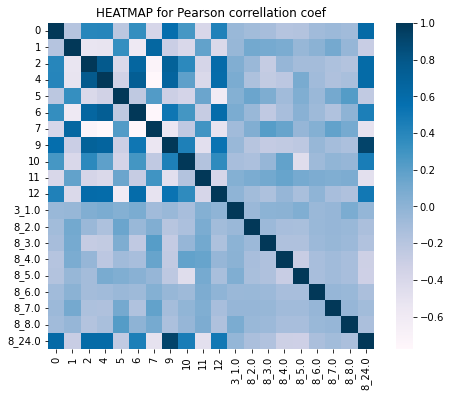

In [9]:
# 1.5. Corellation check

def plot_corr_map(corr_matrix):
    "plot given correlation matrix in heatmap style"
    fig = plt.figure(figsize=(8,6))
    ax = plt.axes()
    ax.set_title('HEATMAP for Pearson correllation coef')
    sns.heatmap(corr_matrix, square=True,ax=ax,cmap='PuBu');

# 2.4.2. Корелляция непрерывных данных
#corr_matrix = X_train_df.corr()
#plot_corr_map(corr_matrix)

# 3.5.3. Корелляция всех признаков
corr_matrix = X_train_df.corr()
plot_corr_map(corr_matrix)

correlated_features = dict()
corr_threshold = 0.75

for col in corr_matrix.columns:
    for row in corr_matrix[col].index:
        if corr_threshold < abs(corr_matrix.loc[row, col]) < 1.0:
            pair = f'{row}-{col}'
            correlated_features[pair] = corr_matrix.loc[row, col]

display(correlated_features)

Существует 4 пары признаков, корелляционно связанных. Однако вследствие того, что для обучения будет использоваться в общем случае нелинейная модель (ИНС), а также за счет регуляризации (Dropout) - удаляться данные признаки здесь не будут.  
Далее будет проверены главные компоненты и кластерный анализ

In [10]:
# маштабирование
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train_df)
X_train_scaled = pd.DataFrame(data = X_train_scaled, columns=X_train_df.columns)

X_test_scaled = scaler.transform(X_test_df)
X_test_scaled = pd.DataFrame(data = X_test_scaled, columns=X_test_df.columns)

In [13]:
# воспользуемся методом главных компонент
from sklearn.decomposition import PCA
break_even = [0.8, 0.9, 0.95, 0.975, 0.99]

pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
var_vector = np.cumsum(pca.explained_variance_ratio_)

for level in break_even:
    temp_list = []
    for n in var_vector:
        if n<=level: temp_list.append(n)
    print(f'required number of components for {level*100}% of total VAR is {len(temp_list)}')  

required number of components for 80.0% of total VAR is 6
required number of components for 90.0% of total VAR is 9
required number of components for 95.0% of total VAR is 12
required number of components for 97.5% of total VAR is 14
required number of components for 99.0% of total VAR is 17


Исходя из выводов РСА - удаление 3 признаков сохраняет 99% вариации, что соответствует выводам корелляции. 
Вследствие того, что в целом пространство признаков небольшое, преобразование далее осуществляться не будет

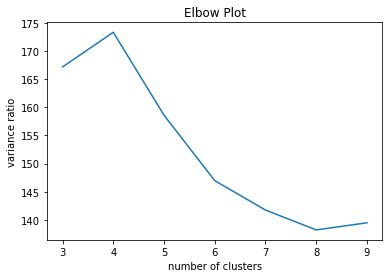

Silhouette Score for 3 clusters is 0.42496


In [17]:
# проверим KNN

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score

n_cluster_list, calinski_metric_list = [], []

for n_cluster in range(3,10):
    n_cluster_list.append(n_cluster)
    k_means = KMeans(n_clusters=n_cluster, random_state=37, init='k-means++')
    k_means.fit(X_train_scaled)
    calinski_metric_list.append(calinski_harabasz_score(X_train_scaled, k_means.labels_))
    
plt.plot(n_cluster_list, calinski_metric_list)
plt.xlabel('number of clusters')
plt.ylabel('variance ratio')
plt.title('Elbow Plot')
plt.show()

k_means_optimal = KMeans(n_clusters=4, random_state=37, init='k-means++')
k_means_optimal.fit(X_train_scaled)
silhouette_avg = silhouette_score(X_train_scaled, k_means.labels_)
print(f'Silhouette Score for 3 clusters is {round(silhouette_avg,5)}')


Оптимальное количество кластеров = 4, однако метрика Silhouette Score (=0.41) - далека от 1, поэтому генерация производных признаков на основе кластеров осуществляться не будет

In [20]:
# Вернем в numpy
X_train_nn = X_train_scaled.to_numpy()
X_test_nn = X_test_scaled.to_numpy()

X_train.shape, X_train_nn.shape, X_test.shape, X_test_nn.shape, 

((404, 13), (404, 20), (102, 13), (102, 20))

#### Функции ####

In [18]:
# Функции
from tensorflow.keras.models import Model

def model_compiler(layers_list, compile_params,  display_model=True, func_style=True):
    compile_params_keys = list(compile_params.keys())
    
    if len( set(compile_params_keys) - set(['optimizer', 'loss', 'metrics']) ) > 0:
        raise KeyError('incorrect compile params name')
    
    model = Sequential()
    
    if not func_style:
        for layer in layers_list:
            model.add(layer)
    else:
        model = Model(layers_list[0], layers_list[-1])
    
    optimizer = compile_params['optimizer']
    loss = compile_params['loss']
    metrics = compile_params['metrics']
    
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

    if display_model:
        model.summary()

    return model

# в качестве одной из метрик будет использоваться R2
def r2(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )


def model_fit_valid(model, X , y, n_epochs=10, batch_size=32, 
                      validation_split=0.15, use_early_stopping=False, verbose_mode=0, show_chart=True):
    
    if use_early_stopping:
        es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=0.15*n_epochs)
        callbacks = [es]
    else:
        callbacks = None
    
    start_time = time.time()
    history = model.fit(x=X, y=y, epochs=n_epochs, batch_size=batch_size, 
                        validation_split=validation_split, shuffle=True, verbose=verbose_mode,
                        callbacks=callbacks)
    
    if show_chart:
        fig = plt.figure(figsize=(10, 4))
        plt.plot(history.history['loss'], label='train')
        plt.plot(history.history['val_loss'], label='valid')
        plt.legend()
        plt.show()
    
    best_idx = np.array(history.history['val_loss']).argmin()
    optimal_epoch_number = history.epoch[best_idx] + 1
    
    best_val_mape = history.history['val_mean_absolute_percentage_error'][best_idx]
    best_val_r2 = history.history['val_r2'][best_idx]
    
    best_val_loss = history.history['val_loss'][best_idx]
    best_tr_mape = history.history['mean_absolute_percentage_error'][best_idx]
    best_tr_r2 = history.history['r2'][best_idx]
    
    
    print(f'optimal epoch number: {optimal_epoch_number}')
    print('params on optimal epoch:')
    print(f'mape on valid: {best_val_mape:.4f}, on train: {best_tr_mape:.4f}')
    print(f'r2 on valid: {best_val_r2:.4f}, on train: {best_tr_r2:.4f}')
    print(f'best val loss: {best_val_loss}')
    print(f'refit finished in {(time.time()-start_time):1f} sec')
          
    return model

def model_predict(model, X_train_nn, y_train, X_test_nn, y_test, n_epochs=10, 
                batch_size=32, refit_model_on_full_data=True, verbose_refit=0):
    
    if refit_model_on_full_data:
        start_time = time.time()
        print('refit on full train (99%) dataset activated')
        model.fit(x=X_train_nn, y=y_train, epochs=n_epochs, batch_size=batch_size, validation_split=0.01,
                 verbose=verbose_refit)
        print(f'refit succeed in {(time.time()-start_time):.1f} sec')
        print()
    
    start_time = time.time()
    predict = model.predict(X_test_nn)
    print(f'predict generated in {(time.time()-start_time):.1f} sec')
    print(f'r2 on test dataset: {r2_score(y_test, predict):.4f}')   
        
    return predict

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 20)                420       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_4 (Dense)             (None, 5)                 105       
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 531
Trainable params: 531
Non-trainable params: 0
_________________________________________________________________


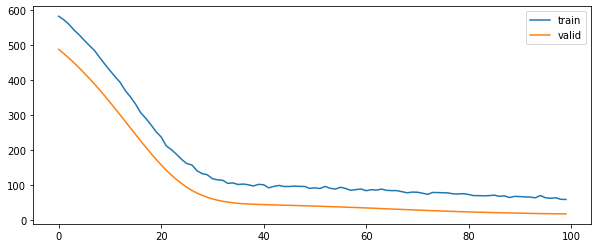

optimal epoch number: 100
params on optimal epoch:
mape on valid: 18.4816, on train: 25.4083
r2 on valid: 0.6043, on train: 0.2844
best val loss: 18.640518188476562
refit finished in 12.645171 sec
refit on full train (99%) dataset activated
refit succeed in 11.7 sec

predict generated in 0.2 sec
r2 on test dataset: 0.6621


In [21]:
#  Тестовый прогон функций

x_input = keras.layers.Input(shape=(20))
x_2 = keras.layers.Dense(20, activation='sigmoid')
x_3 = keras.layers.Dropout(0.2)
x_4 = keras.layers.Dense(5, activation='relu')
x_out = keras.layers.Dense(1, activation='linear')

sequence = [x_input, x_2, x_3, x_4, x_out]

comp_params = {
    'loss': 'mse',
    'optimizer': 'adam',
    'metrics': ['mean_absolute_percentage_error', r2]
}


model = model_compiler(sequence, comp_params,  display_model=True, func_style=False)

model = model_fit_valid(model, X_train_nn , y_train, n_epochs=100, batch_size=32, 
                      validation_split=0.1, use_early_stopping=False, verbose_mode=0, show_chart=True)

pred = model_predict(model, X_train_nn, y_train, X_test_nn, y_test, n_epochs=100, batch_size=32, 
                   refit_model_on_full_data=True, verbose_refit=0)

#### Подбор гиперпараметров

- я буду использовать early stopping callback с 15% долей

- поиск будет вестись с последовательным сужением пространства гиперпараметров
  
  - поиск оптимальной архитектуры (без учета Dropout), c использованием Relu и с небольшим числом нодов (32)
    - 1 слой
    - 2 слоя
    - 3 слоя
  - количество нодов
  - выбор оптимальной активационной функции
  - добавление dropout
  - выбор batch size
  - вариация алгоритмов оптимизации

In [22]:

from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam, Adagrad, RMSprop, SGD

input_shape = (20)

comp_params = {
    'loss': 'mse',
    'optimizer': 'adam',
    'metrics': ['mean_absolute_percentage_error', r2]
}

##### Layers num

1-hidden layer
--------------------------------------------------------------------------------
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 20)]              0         
                                                                 
 dense_6 (Dense)             (None, 40)                840       
                                                                 
 dense_7 (Dense)             (None, 1)                 41        
                                                                 
Total params: 881
Trainable params: 881
Non-trainable params: 0
_________________________________________________________________


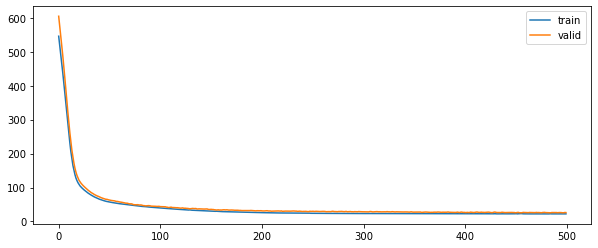

optimal epoch number: 484
params on optimal epoch:
mape on valid: 17.6120, on train: 17.7276
r2 on valid: 0.5541, on train: 0.7394
best val loss: 25.32931900024414
refit finished in 56.379520 sec
********************************************************************************
2-hidden layer
--------------------------------------------------------------------------------
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 20)]              0         
                                                                 
 dense_8 (Dense)             (None, 40)                840       
                                                                 
 dense_9 (Dense)             (None, 20)                820       
                                                                 
 dense_10 (Dense)            (None, 1)                 21        
                

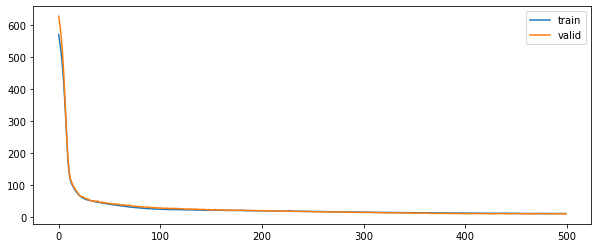

optimal epoch number: 487
params on optimal epoch:
mape on valid: 10.3515, on train: 12.3394
r2 on valid: 0.8424, on train: 0.8006
best val loss: 10.043664932250977
refit finished in 55.494998 sec
********************************************************************************
3-hidden layer
--------------------------------------------------------------------------------
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 20)]              0         
                                                                 
 dense_11 (Dense)            (None, 40)                840       
                                                                 
 dense_12 (Dense)            (None, 30)                1230      
                                                                 
 dense_13 (Dense)            (None, 20)                620       
               

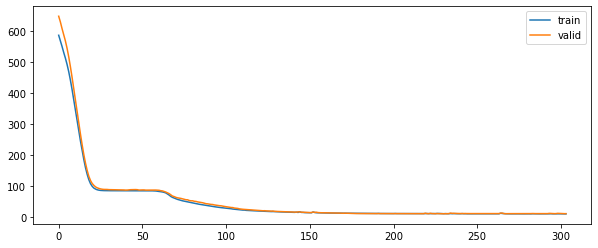

optimal epoch number: 229
params on optimal epoch:
mape on valid: 11.0757, on train: 11.5897
r2 on valid: 0.8478, on train: 0.8710
best val loss: 9.812139511108398
refit finished in 34.431899 sec
********************************************************************************
4-hidden layer
--------------------------------------------------------------------------------
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 20)]              0         
                                                                 
 dense_15 (Dense)            (None, 40)                840       
                                                                 
 dense_16 (Dense)            (None, 30)                1230      
                                                                 
 dense_17 (Dense)            (None, 20)                620       
                

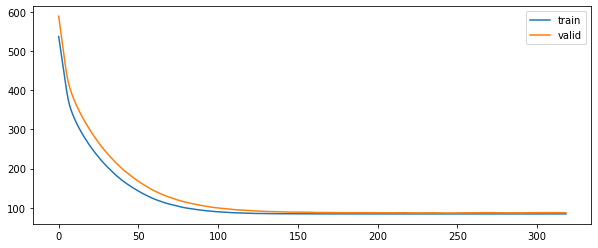

optimal epoch number: 244
params on optimal epoch:
mape on valid: 29.4815, on train: 36.6174
r2 on valid: -0.1061, on train: -0.1272
best val loss: 86.51010131835938
refit finished in 37.941136 sec
********************************************************************************


In [23]:
# 4.1.1. Подбор количества слоев

# 1-layer case
x_in = Input(input_shape)
x_1 = Dense(40, activation='linear')(x_in)
x_out = Dense(1, activation='linear')(x_1)
layers_seq1 = [x_in, x_1, x_out] 

print('1-hidden layer')
print(80*'-')
model = model_compiler(layers_list=layers_seq1, compile_params=comp_params, display_model=True,
                                     func_style=True)
    
model = model_fit_valid(model, X_train_nn, y_train, n_epochs=500, batch_size=32, validation_split=0.2, 
                      use_early_stopping=True, verbose_mode=0, show_chart=True)
    
print(80*'*')


# 2-layer case
x_in = Input(input_shape)
x_1 = Dense(40, activation='linear')(x_in)
x_2 = Dense(20, activation='relu')(x_1)
x_out = Dense(1, activation='linear')(x_2)
layers_seq2 = [x_in, x_1, x_2, x_out] 

print('2-hidden layer')
print(80*'-')
model = model_compiler(layers_list=layers_seq2, compile_params=comp_params, display_model=True,
                                     func_style=True)
    
model = model_fit_valid(model, X_train_nn, y_train, n_epochs=500, batch_size=32, validation_split=0.2, 
                      use_early_stopping=True, verbose_mode=0, show_chart=True)
    
print(80*'*')


# 3-layer case
x_in = Input(input_shape)
x_1 = Dense(40, activation='linear')(x_in)
x_2 = Dense(30, activation='sigmoid')(x_1)
x_3 = Dense(20, activation='relu')(x_2)
x_out = Dense(1, activation='linear')(x_3)
layers_seq3 = [x_in, x_1, x_2, x_3, x_out] 

print('3-hidden layer')
print(80*'-')
model = model_compiler(layers_list=layers_seq3, compile_params=comp_params, display_model=True,
                                     func_style=True)
    
model = model_fit_valid(model, X_train_nn, y_train, n_epochs=500, batch_size=32, validation_split=0.2, 
                      use_early_stopping=True, verbose_mode=0, show_chart=True)
    
print(80*'*')


# 4-layer case
x_in = Input(input_shape)
x_1 = Dense(40, activation='linear')(x_in)
x_2 = Dense(30, activation='sigmoid')(x_1)
x_3 = Dense(20, activation='relu')(x_2)
x_4 = Dense(20, activation='tanh')(x_3)
x_out = Dense(1, activation='linear')(x_4)
layers_seq4 = [x_in, x_1, x_2, x_3, x_4, x_out] 

print('4-hidden layer')
print(80*'-')
model = model_compiler(layers_list=layers_seq4, compile_params=comp_params, display_model=True,
                                     func_style=True)
    
model = model_fit_valid(model, X_train_nn, y_train, n_epochs=500, batch_size=32, validation_split=0.2, 
                      use_early_stopping=True, verbose_mode=0, show_chart=True)
    
print(80*'*')

Наилучшие показатели у сети с двумя и тремя скрытыми слоями, возьмем наиболее простой вариант (2 слоя)

##### Количество нейронов и активационная функция

2-hidden layer: 20-20, Relu
--------------------------------------------------------------------------------


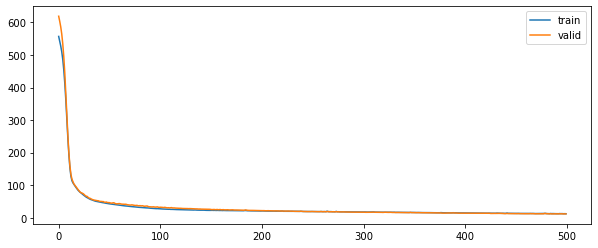

optimal epoch number: 493
params on optimal epoch:
mape on valid: 11.8189, on train: 12.6056
r2 on valid: 0.8122, on train: 0.8154
best val loss: 11.670415878295898
refit finished in 61.458126 sec
********************************************************************************
2-hidden layer: 20-20, Sigmoid
--------------------------------------------------------------------------------


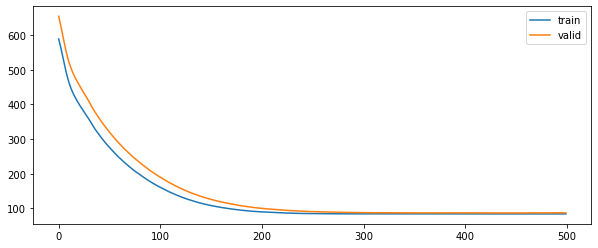

optimal epoch number: 439
params on optimal epoch:
mape on valid: 29.3702, on train: 36.4409
r2 on valid: -0.1055, on train: -0.0407
best val loss: 86.71149444580078
refit finished in 59.122871 sec
********************************************************************************
2-hidden layer: 128-128, Relu
--------------------------------------------------------------------------------
Epoch 00269: early stopping


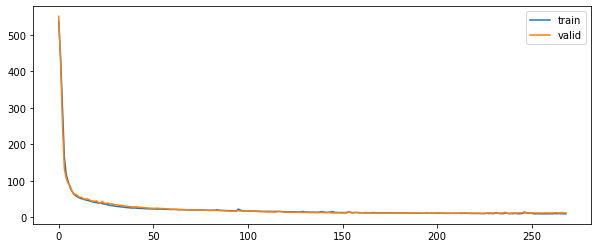

optimal epoch number: 194
params on optimal epoch:
mape on valid: 11.0175, on train: 11.5928
r2 on valid: 0.8312, on train: 0.7981
best val loss: 10.405162811279297
refit finished in 32.081278 sec
********************************************************************************
2-hidden layer: 128-128, Sigmoid
--------------------------------------------------------------------------------
Epoch 00476: early stopping


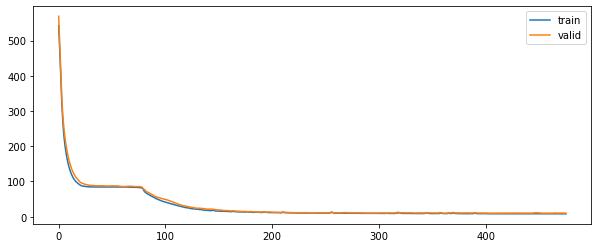

optimal epoch number: 401
params on optimal epoch:
mape on valid: 10.5824, on train: 10.8814
r2 on valid: 0.8437, on train: 0.8924
best val loss: 9.826085090637207
refit finished in 57.801555 sec
********************************************************************************
2-hidden layer: 256-128, Sigmoid
--------------------------------------------------------------------------------
Epoch 00463: early stopping


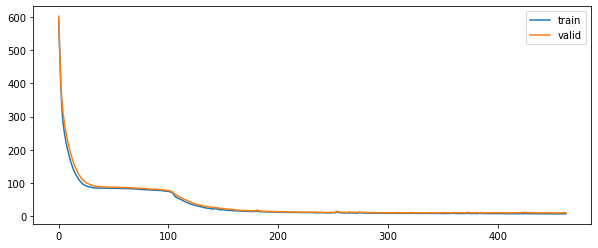

optimal epoch number: 388
params on optimal epoch:
mape on valid: 10.5596, on train: 10.5787
r2 on valid: 0.8395, on train: 0.8866
best val loss: 9.883197784423828
refit finished in 53.915107 sec
********************************************************************************
2-hidden layer: 256-256, Sigmoid
--------------------------------------------------------------------------------
Epoch 00315: early stopping


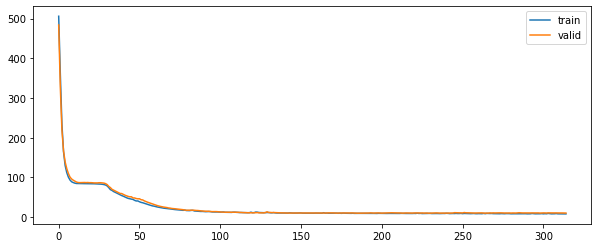

optimal epoch number: 240
params on optimal epoch:
mape on valid: 10.8871, on train: 11.6305
r2 on valid: 0.8416, on train: 0.8530
best val loss: 9.901881217956543
refit finished in 36.581876 sec
********************************************************************************


In [24]:
# Подбор количества нейронов и актив.функции

# вариант 1
x_in = Input(input_shape)
x_1 = Dense(20, activation='linear')(x_in)
x_2 = Dense(20, activation='relu')(x_1)
x_out = Dense(1, activation='linear')(x_2)
layers_seq1 = [x_in, x_1, x_2, x_out] 

print('Вариант №1 - 2-hidden layer: 20-20, Relu')
print(80*'-')
model = model_compiler(layers_list=layers_seq1, compile_params=comp_params, display_model=False,
                                     func_style=True)
    
model = model_fit_valid(model, X_train_nn, y_train, n_epochs=500, batch_size=32, validation_split=0.2, 
                      use_early_stopping=True, verbose_mode=0, show_chart=True)
    
print(80*'*')


# вариант 2
x_in = Input(input_shape)
x_1 = Dense(20, activation='linear')(x_in)
x_2 = Dense(20, activation='sigmoid')(x_1)
x_out = Dense(1, activation='linear')(x_2)
layers_seq2 = [x_in, x_1, x_2, x_out] 

print('Вариант №2 - 2-hidden layer: 20-20, Sigmoid')
print(80*'-')
model = model_compiler(layers_list=layers_seq2, compile_params=comp_params, display_model=False,
                                     func_style=True)
    
model = model_fit_valid(model, X_train_nn, y_train, n_epochs=500, batch_size=32, validation_split=0.2, 
                      use_early_stopping=True, verbose_mode=0, show_chart=True)
    
print(80*'*')



# вариант 3
x_in = Input(input_shape)
x_1 = Dense(128, activation='linear')(x_in)
x_2 = Dense(128, activation='relu')(x_1)
x_out = Dense(1, activation='linear')(x_2)
layers_seq3 = [x_in, x_1, x_2, x_out] 

print('Вариант №3 - 2-hidden layer: 128-128, Relu')
print(80*'-')
model = model_compiler(layers_list=layers_seq3, compile_params=comp_params, display_model=False,
                                     func_style=True)
    
model = model_fit_valid(model, X_train_nn, y_train, n_epochs=500, batch_size=32, validation_split=0.2, 
                      use_early_stopping=True, verbose_mode=0, show_chart=True)
    
print(80*'*')



# вариант 4
x_in = Input(input_shape)
x_1 = Dense(128, activation='linear')(x_in)
x_2 = Dense(128, activation='sigmoid')(x_1)
x_out = Dense(1, activation='linear')(x_2)
layers_seq4 = [x_in, x_1, x_2, x_out] 

print('Вариант №4 - 2-hidden layer: 128-128, Sigmoid')
print(80*'-')
model = model_compiler(layers_list=layers_seq4, compile_params=comp_params, display_model=False,
                                     func_style=True)
    
model = model_fit_valid(model, X_train_nn, y_train, n_epochs=500, batch_size=32, validation_split=0.2, 
                      use_early_stopping=True, verbose_mode=0, show_chart=True)
    
print(80*'*')


# вариант 5
x_in = Input(input_shape)
x_1 = Dense(256, activation='linear')(x_in)
x_2 = Dense(128, activation='sigmoid')(x_1)
x_out = Dense(1, activation='linear')(x_2)
layers_seq5 = [x_in, x_1, x_2, x_out] 

print('Вариант №5 - 2-hidden layer: 256-128, Sigmoid')
print(80*'-')
model = model_compiler(layers_list=layers_seq5, compile_params=comp_params, display_model=False,
                                     func_style=True)
    
model = model_fit_valid(model, X_train_nn, y_train, n_epochs=500, batch_size=32, validation_split=0.2, 
                      use_early_stopping=True, verbose_mode=0, show_chart=True)
    
print(80*'*')


# вариант 6
x_in = Input(input_shape)
x_1 = Dense(256, activation='linear')(x_in)
x_2 = Dense(256, activation='sigmoid')(x_1)
x_out = Dense(1, activation='linear')(x_2)
layers_seq6 = [x_in, x_1, x_2, x_out] 

print('Вариант №6 - 2-hidden layer: 256-256, Sigmoid')
print(80*'-')
model = model_compiler(layers_list=layers_seq6, compile_params=comp_params, display_model=False,
                                     func_style=True)
    
model = model_fit_valid(model, X_train_nn, y_train, n_epochs=500, batch_size=32, validation_split=0.2, 
                      use_early_stopping=True, verbose_mode=0, show_chart=True)
    
print(80*'*')

Выводы:
- оптимальное количество нейронов - 128-128
- оптимальная функция - Sigmoid
- модель обучается за ~ 380 эпох

##### Dropout (одна из полезных команд TensorFlow)

dropout rate: 0
--------------------------------------------------------------------------------


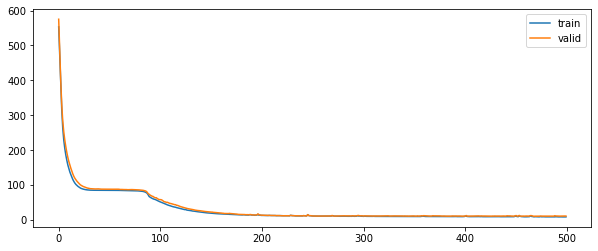

optimal epoch number: 468
params on optimal epoch:
mape on valid: 10.7417, on train: 10.5990
r2 on valid: 0.8454, on train: 0.8986
best val loss: 9.791488647460938
refit finished in 56.307827 sec
********************************************************************************
dropout rate: 0.1
--------------------------------------------------------------------------------
Epoch 00407: early stopping


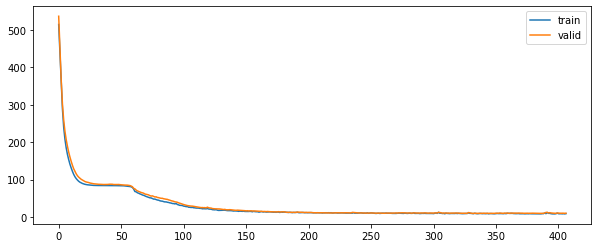

optimal epoch number: 332
params on optimal epoch:
mape on valid: 10.8133, on train: 11.8559
r2 on valid: 0.8438, on train: 0.8879
best val loss: 9.778733253479004
refit finished in 45.546868 sec
********************************************************************************
dropout rate: 0.2
--------------------------------------------------------------------------------
Epoch 00335: early stopping


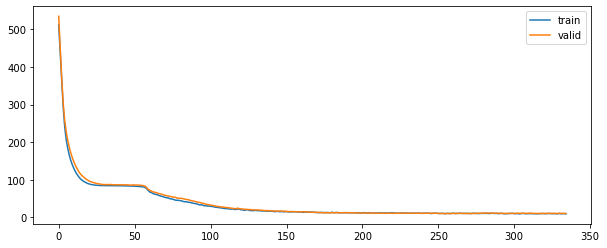

optimal epoch number: 260
params on optimal epoch:
mape on valid: 10.7909, on train: 12.3632
r2 on valid: 0.8411, on train: 0.8421
best val loss: 9.91823959350586
refit finished in 38.082602 sec
********************************************************************************
dropout rate: 0.3
--------------------------------------------------------------------------------
Epoch 00463: early stopping


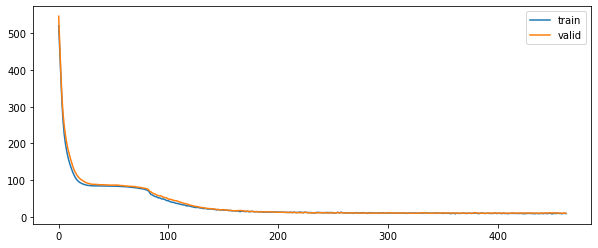

optimal epoch number: 388
params on optimal epoch:
mape on valid: 10.7240, on train: 12.0116
r2 on valid: 0.8455, on train: 0.8828
best val loss: 9.698970794677734
refit finished in 53.508925 sec
********************************************************************************


In [25]:
# 3.3.1. 1 слой dropout
dropout_rates = [0, 0.1, 0.2, 0.3]

for d in dropout_rates:
    x_in = Input(input_shape)
    x_1 = Dense(128, activation='linear')(x_in)
    x_d1 = Dropout(d)(x_1)
    x_2 = Dense(128, activation='sigmoid')(x_d1)
    x_out = Dense(1, activation='linear')(x_2)
    layers_seq = [x_in, x_1, x_d1, x_2, x_out] 

    print(f'dropout rate: {d}')
    print(80*'-')
    model = model_compiler(layers_list=layers_seq, compile_params=comp_params, display_model=False,
                                         func_style=True)

    model = model_fit_valid(model, X_train_nn, y_train, n_epochs=500, batch_size=32, validation_split=0.2, 
                          use_early_stopping=True, verbose_mode=0, show_chart=True)

    print(80*'*')
    

Особо dropout параметры не улучшает, поэтому на следующий этап модель будет без служебных слоев

##### Batch Size

In [ ]:
batch_sizes = [16, 32, 64, 256]

for bs in batch_sizes:
    x_in = Input(input_shape)
    x_1 = Dense(128, activation='linear')(x_in)
    x_2 = Dense(128, activation='sigmoid')(x_1)
    x_out = Dense(1, activation='linear')(x_2)
    layers_seq = [x_in, x_1, x_2, x_out] 

    print(f'batch size: {bs}')
    print(80*'-')
    model = model_compiler(layers_list=layers_seq, compile_params=comp_params, display_model=False,
                                         func_style=True)

    model = model_fit_valid(model, X_train_nn, y_train, n_epochs=500, batch_size=bs, validation_split=0.2, 
                          use_early_stopping=True, verbose_mode=0, show_chart=True)

    print(80*'*')

##### Optimizer 

In [ ]:

comp_params_1 = {
    'loss': 'mse',
    'optimizer': Adam(),
    'metrics': ['mean_absolute_percentage_error', r2]
}

comp_params_2 = {
    'loss': 'mse',
    'optimizer': Adagrad(),
    'metrics': ['mean_absolute_percentage_error', r2]
}

comp_params_3 = {
    'loss': 'mse',
    'optimizer': RMSprop(),
    'metrics': ['mean_absolute_percentage_error', r2]
}

comp_params_4 = {
    'loss': 'mse',
    'optimizer': SGD(),
    'metrics': ['mean_absolute_percentage_error', r2]
}



optimizers = [comp_params_1, comp_params_2, comp_params_3, comp_params_4]

for params in optimizers:
    x_in = Input(input_shape)
    x_1 = Dense(128, activation='linear')(x_in)
    x_2 = Dense(128, activation='sigmoid')(x_1)
    x_out = Dense(1, activation='linear')(x_2)
    layers_seq = [x_in, x_1, x_2, x_out] 

    print(f'optimizer: {params["optimizer"]}')
    print(80*'-')
    model = model_compiler(layers_list=layers_seq, compile_params=params, display_model=False,
                                         func_style=True)

    model = model_fit_valid(model, X_train_nn, y_train, n_epochs=1000, batch_size=64, validation_split=0.2, 
                          use_early_stopping=True, verbose_mode=0, show_chart=True)

    print(80*'*')

Лучший Adam

In [ ]:
# Шаги
lr_list = [0.01, 0.001, 0.0001]
epsilon_list = [1e-5, 1e-7, 1e-9]

grid = list(itertools.product(lr_list, epsilon_list))

for comb in grid:
    lr = comb[0]
    eps = comb[1]
    comp_params_ = {
                    'loss': 'mse',
                    'optimizer': Adam(learning_rate=lr, epsilon=eps),
                    'metrics': ['mean_absolute_percentage_error', r2]
                    }

    x_in = Input(input_shape)
    x_1 = Dense(128, activation='linear')(x_in)
    x_2 = Dense(128, activation='sigmoid')(x_1)
    x_out = Dense(1, activation='linear')(x_2)
    layers_seq = [x_in, x_1, x_2, x_out] 

    print(f'lr: {lr}, epsilon: {eps}')
    print(80*'-')
    model = model_compiler(layers_list=layers_seq, compile_params=comp_params_, 
                                                          display_model=False, func_style=True)

    model = model_fit_valid(model, X_train_nn, y_train, n_epochs=1000, batch_size=64, 
                                               validation_split=0.2, use_early_stopping=True, verbose_mode=0, 
                                               show_chart=True)

    print(80*'*')

Выводы по подбору параметров
- оптимальная архитектура: FC(128, linear) - FC(128, sigmoid) - FC(1, linear)
- размер батча: 64
- существенный прирост по метрике аккуратности достигнут был (с 50 до 85%)
- оптимальный оптимизатор - ADAM(lr=0.01, epsilon=1e-5)

#### Обучение финальной модели и валидация на тестовой выборке

In [ ]:
comp_params_opt = {
                    'loss': 'mse',
                    'optimizer': Adam(learning_rate=0.01, epsilon=1e-5),
                    'metrics': ['mean_absolute_percentage_error', r2]
                    }

x_in = Input(input_shape)
x_1 = Dense(128, activation='linear')(x_in)
x_2 = Dense(128, activation='sigmoid')(x_1)
x_out = Dense(1, activation='linear')(x_2)
layers_opt = [x_in, x_1, x_2, x_out] 



model = model_compiler(layers_list=layers_opt, compile_params=comp_params_opt, display_model=False,
                                     func_style=True)

predict = model_predict(model, X_train_nn, y_train, X_test_nn, y_test, n_epochs=450, batch_size=64, 
                      refit_model_on_full_data=True, verbose_refit=0)